In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [127]:
# Read in data, fix cols for the visuals
df = pd.read_csv("../Web-Scraping-Stats/cleaned_stats_data/player_stats_combined.csv", index_col=False)
df.rename(columns={'X3P':'ThreeP', 'X3PA': 'ThreeP_Attempted', 'X3P.': 'ThreeP_Percentage', 'FG.': 'FG_Percentage', 'FT.': 'FT_Percentage'}, inplace=True)
df.head()

,Players,Tm,MP,FG,FGA,ThreeP,ThreeP_Attempted,FT,FTA,ORB,...,BLK,TOV,PF,PTS,FG_Percentage,ThreeP_Percentage,FT_Percentage,Player_Type,Region,Year
0,George Gervin,SAS,40:00:00,14,26,0,0,6,9,4,...,0,3,2,34,0.538,NaN,0.667,Starter,East,1980
1,Eddie Johnson,ATL,32:00:00,11,16,0,0,0,0,1,...,0,2,2,22,0.688,NaN,NaN,Starter,East,1980
2,Moses Malone,HOU,31:00:00,7,12,0,0,6,12,6,...,2,5,4,20,0.583,NaN,0.500,Starter,East,1980
3,Julius Erving,PHI,20:00,4,12,0,0,3,4,2,...,1,2,5,11,0.333,NaN,0.750,Starter,East,1980
4,John Drew,ATL,15:00,0,4,0,0,4,5,1,...,0,3,5,4,0.000,NaN,0.800,Starter,East,1980


In [128]:
# Creating subsets of dataframe to create the NBA Divisions
Atlantic_Div = df.loc[df['Tm'].isin(["BOS", "PHI", "NYK", "TOR", "BKN"])]
Central_Div = df.loc[df['Tm'].isin(["IND", "MIL", "DET", "CHI", "CLE"])]
Southeast_Div = df.loc[df['Tm'].isin(["ORL", "CHA", "WSH", "MIA", "ATL"])]
Northwest_Div = df.loc[df['Tm'].isin(["DEN", "OKC", "MIN", "UTA", "POR"])]
Pacific_Div = df.loc[df['Tm'].isin(["PHO", "GSW", "LAL", "LAC", "SAC"])]
Southwest_Div = df.loc[df['Tm'].isin(["DAL", "NOH", "SAS", "HOU", "MEM"])]

In [129]:
# Creating subsets of players by Game_Year
Game_1980s = df[df['Year'].between(1980,1989)]
Game_1990s = df[df['Year'].between(1990,1999)]
Game_2000s = df[df['Year'].between(2000,2010)]

In [130]:
# Find duplicates
df.duplicated().sum()

0

In [131]:
# Find null values
df.isnull().sum()

Players                0
Tm                     0
MP                     0
FG                     0
FGA                    0
ThreeP                 0
ThreeP_Attempted       0
FT                     0
FTA                    0
ORB                    0
DRB                    0
TRB                    0
AST                    0
STL                    0
BLK                    0
TOV                    0
PF                     0
PTS                    0
FG_Percentage          6
ThreeP_Percentage    397
FT_Percentage        294
Player_Type            0
Region                 0
Year                   0
dtype: int64

In [132]:
# Look at general information of the dataframe
print("number of rows:", len(df.index))
print("number of col:",  len(df.columns))
print("keys:",  df.keys(),type(df.keys()))
print("info",df.info() )
print("head", df.head())
print("TYPES", df.dtypes)

number of rows: 715
number of col: 24
keys: Index(['Players', 'Tm', 'MP', 'FG', 'FGA', 'ThreeP', 'ThreeP_Attempted', 'FT',
       'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'FG_Percentage', 'ThreeP_Percentage', 'FT_Percentage', 'Player_Type',
       'Region', 'Year'],
      dtype='object') <class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Players            715 non-null    object 
 1   Tm                 715 non-null    object 
 2   MP                 715 non-null    object 
 3   FG                 715 non-null    int64  
 4   FGA                715 non-null    int64  
 5   ThreeP             715 non-null    int64  
 6   ThreeP_Attempted   715 non-null    int64  
 7   FT                 715 non-null    int64  
 8   FTA                715 non-null    int64  
 9

In [133]:
# Look at statitics of numerical columns
df.describe()

,FG,FGA,ThreeP,ThreeP_Attempted,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FG_Percentage,ThreeP_Percentage,FT_Percentage,Year
count,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,709.000000,318.000000,421.000000,715.000000
mean,4.513287,9.211189,0.422378,1.283916,1.511888,2.139860,1.581818,2.925874,4.507692,2.769231,1.131469,0.509091,1.738462,1.664336,10.960839,0.480240,0.296057,0.697900,1994.945455
std,2.972004,4.903996,0.904735,2.002577,1.948442,2.577106,1.639825,2.449796,3.377448,3.044240,1.280998,0.894029,1.615789,1.423807,7.060255,0.198504,0.332804,0.308193,9.026174
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1980.000000
25%,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,6.000000,0.364000,0.000000,0.500000,1987.000000
50%,4.000000,8.000000,0.000000,0.000000,1.000000,2.000000,1.000000,2.000000,4.000000,2.000000,1.000000,0.000000,1.000000,1.000000,10.000000,0.500000,0.250000,0.750000,1995.000000
75%,6.000000,12.000000,0.000000,2.000000,2.000000,3.000000,2.000000,4.000000,6.000000,4.000000,2.000000,1.000000,3.000000,3.000000,15.000000,0.600000,0.500000,1.000000,2003.000000
max,17.000000,27.000000,6.000000,11.000000,11.000000,13.000000,9.000000,19.000000,22.000000,22.000000,7.000000,6.000000,12.000000,6.000000,40.000000,1.000000,1.000000,1.000000,2010.000000


In [134]:
# Correlation matrices
print("PEARSON CORRELATION MATRIX:")
print(df.corr(method='pearson',numeric_only=True))

print("SPEARMAN CORRELATION MATRIX:")
print(df.corr(method='spearman',numeric_only=True))

PEARSON CORRELATION MATRIX:
                         FG       FGA    ThreeP  ThreeP_Attempted        FT  \
FG                 1.000000  0.862599  0.265638          0.214803  0.313484   
FGA                0.862599  1.000000  0.268072          0.316622  0.344411   
ThreeP             0.265638  0.268072  1.000000          0.810324 -0.061645   
ThreeP_Attempted   0.214803  0.316622  0.810324          1.000000 -0.084679   
FT                 0.313484  0.344411 -0.061645         -0.084679  1.000000   
FTA                0.315374  0.338986 -0.062614         -0.097532  0.927361   
ORB                0.280618  0.333372 -0.180034         -0.213295  0.243744   
DRB                0.227605  0.223272 -0.082535         -0.107900  0.198681   
TRB                0.301337  0.323807 -0.147277         -0.181823  0.262454   
AST                0.186797  0.209662  0.180874          0.214081  0.081099   
STL                0.324377  0.349169  0.146582          0.172149  0.191842   
BLK                0.156

In [135]:
# Frequency of teams
df['Tm'].value_counts()

Tm
LAL    52
BOS    48
DET    45
PHO    41
SAS    39
OKC    38
PHI    35
UTA    34
HOU    32
ATL    28
DAL    25
CLE    25
CHI    25
DEN    23
MIL    22
NYK    22
POR    20
ORL    18
WAS    18
BKN    18
IND    16
SAC    15
MIA    15
GSW    13
MIN    13
CHA     9
TOR     9
LAC     8
NOH     7
MEM     2
Name: count, dtype: int64

In [136]:
df['Players'].value_counts()

Players
Michael Jordan      13
Hakeem Olajuwon     12
Karl Malone         12
Shaquille O'Neal    12
Kevin Garnett       12
                    ..
Otis Thorpe          1
Jeff Hornacek        1
Kevin Willis         1
Michael Adams        1
Chris Kaman          1
Name: count, Length: 210, dtype: int64

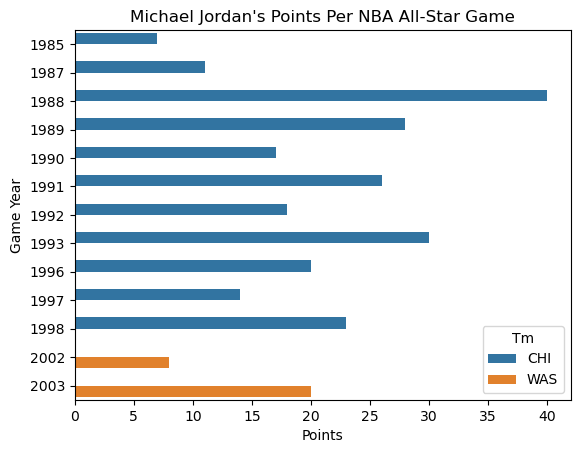

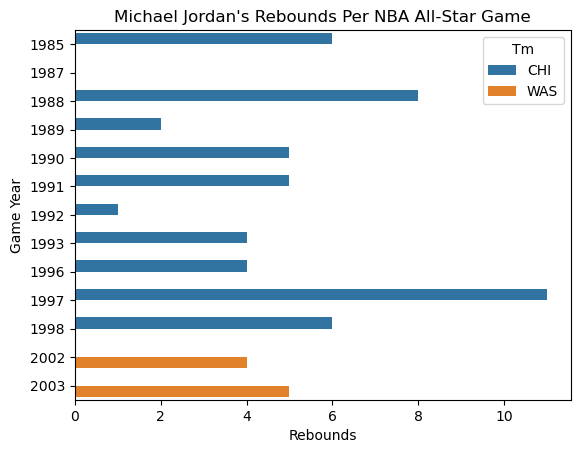

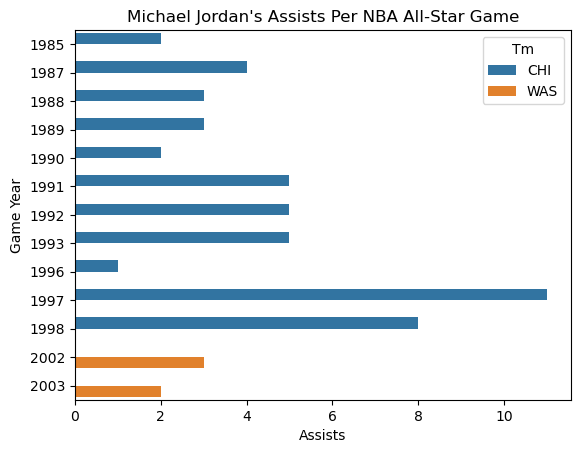

In [137]:
# Michael Jordan stats
MJ = df[df.Players == "Michael Jordan"]
MJ

sns.barplot(data=MJ, x='PTS', y='Year', hue="Tm", orient='h').set(title="Michael Jordan's Points Per NBA All-Star Game", xlabel="Points", ylabel="Game Year")
plt.savefig("../EDA/MJ-PTS.png")
plt.show()

sns.barplot(data=MJ, x='TRB', y='Year', hue="Tm", orient='h').set(title="Michael Jordan's Rebounds Per NBA All-Star Game", xlabel="Rebounds", ylabel="Game Year")
plt.savefig("../EDA/MJ-TRB.png")
plt.show()

sns.barplot(data=MJ, x='AST', y='Year', hue="Tm", orient='h').set(title="Michael Jordan's Assists Per NBA All-Star Game", xlabel="Assists", ylabel="Game Year")
plt.savefig("../EDA/MJ-AST.png")
plt.show()

In [138]:
# How many times each team was featured in an NBA All-Star game
pd.crosstab(df['Region'], df['Tm'])

Tm,ATL,BKN,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,...,OKC,ORL,PHI,PHO,POR,SAC,SAS,TOR,UTA,WAS
Region,,,,,,,,,,,,,,,,,,,,,
East,28,18,48,9,25,25,0,0,45,0,...,0,18,35,0,0,0,1,9,0,18
West,0,0,0,0,0,0,25,23,0,13,...,38,0,0,41,20,15,38,0,34,0


In [139]:
# Variety of player player type by region
pd.crosstab(Game_1980s['Player_Type'], Game_1980s['Region'])

Region,East,West
Player_Type,,
Reserve,67,68
Starter,50,50


In [140]:
# Variety of player player type by region
pd.crosstab(Game_1990s['Player_Type'], Game_1990s['Region'])

Region,East,West
Player_Type,,
Reserve,63,64
Starter,45,45


In [141]:
# Variety of player player type by region
pd.crosstab(Game_2000s['Player_Type'], Game_2000s['Region'])

Region,East,West
Player_Type,,
Reserve,77,76
Starter,55,55


In [142]:
# function to make mean lines in histograms
def mean(x, **kwargs):
    plt.axvline(x.mean(), c='red', ls='-', lw=2.5)

/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self.

<function matplotlib.pyplot.show(close=None, block=None)>

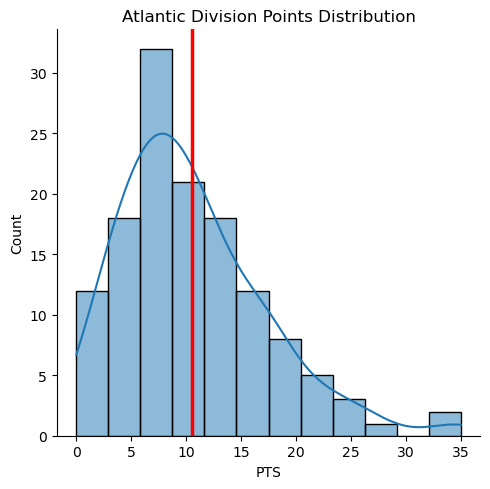

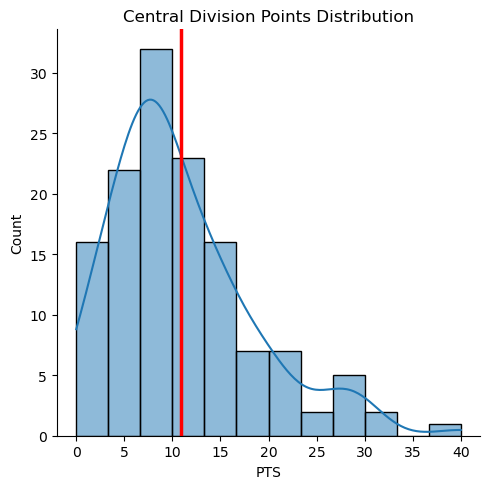

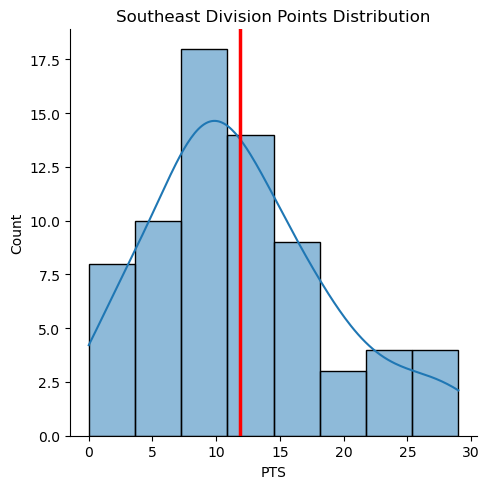

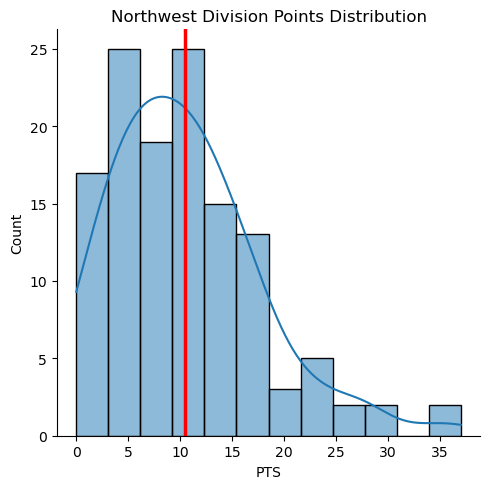

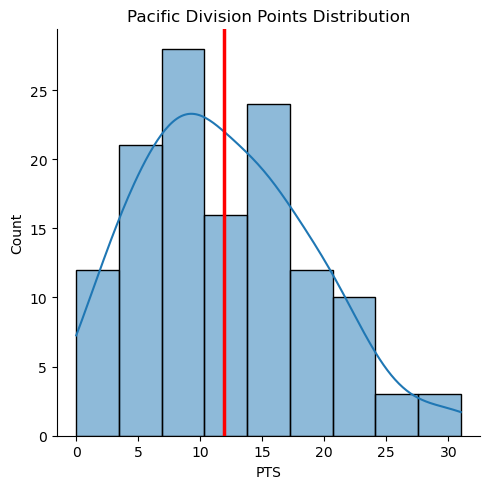

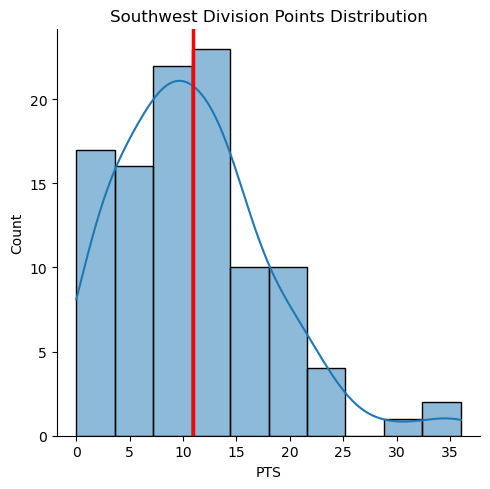

In [143]:
# Distributions of Points by Division
a = sns.displot(data=Atlantic_Div, x="PTS", kde=True).set(title='Atlantic Division Points Distribution')
a.map(mean,'PTS')
plt.savefig("../EDA/Atlantic-PTS.png")
plt.show

b = sns.displot(data=Central_Div, x="PTS", kde=True).set(title='Central Division Points Distribution')
b.map(mean,'PTS')
plt.savefig("../EDA/Central-PTS.png")
plt.show

c = sns.displot(data=Southeast_Div, x="PTS", kde=True).set(title='Southeast Division Points Distribution')
c.map(mean,'PTS')
plt.savefig("../EDA/Southeast-PTS.png")
plt.show

d = sns.displot(data=Northwest_Div, x="PTS", kde=True).set(title='Northwest Division Points Distribution')
d.map(mean,'PTS')
plt.savefig("../EDA/Northwest-PTS.png")
plt.show

e = sns.displot(data=Pacific_Div, x="PTS", kde=True).set(title='Pacific Division Points Distribution')
e.map(mean,'PTS')
plt.savefig("../EDA/Pacific-PTS.png")
plt.show

f = sns.displot(data=Southwest_Div, x="PTS", kde=True).set(title='Southwest Division Points Distribution')
f.map(mean,'PTS')
plt.savefig("../EDA/Atlantic-PTS.png")
plt.show

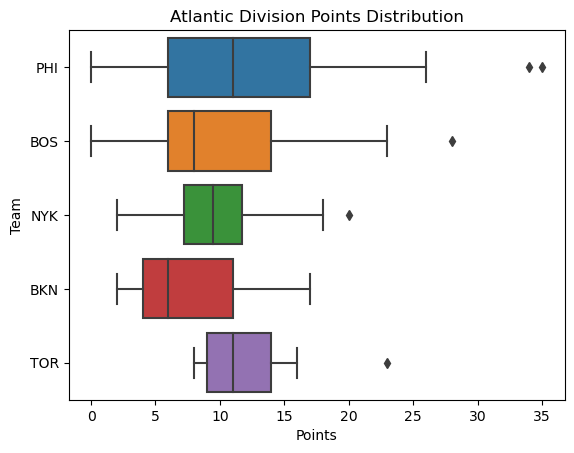

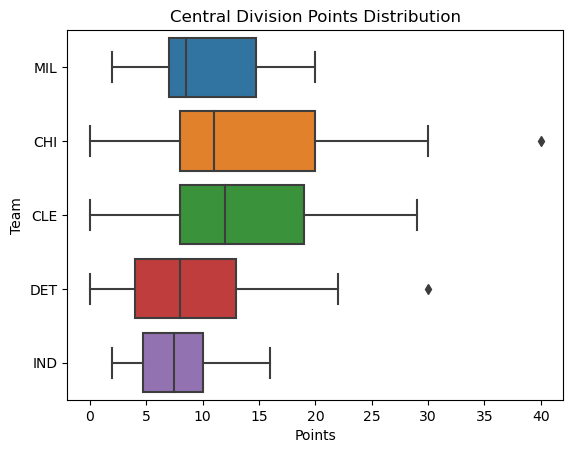

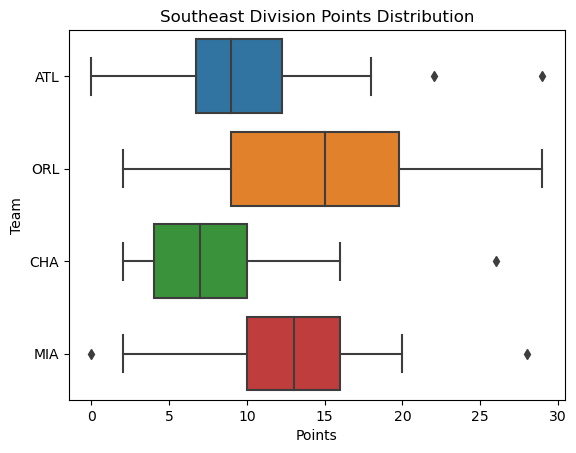

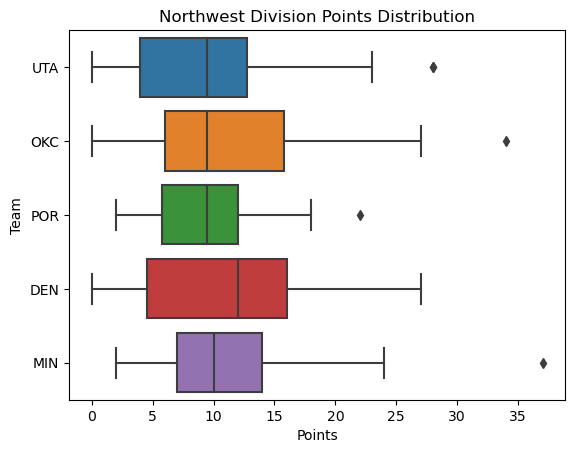

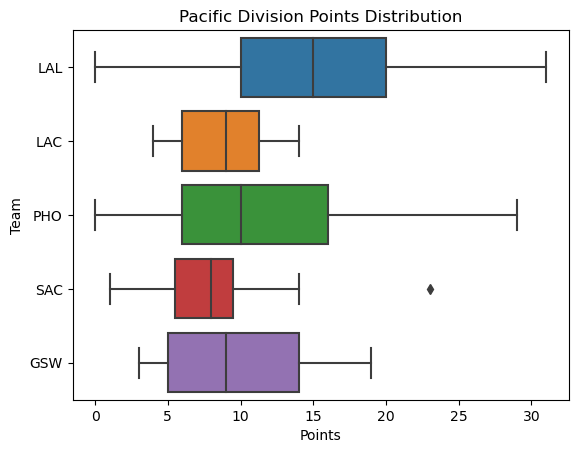

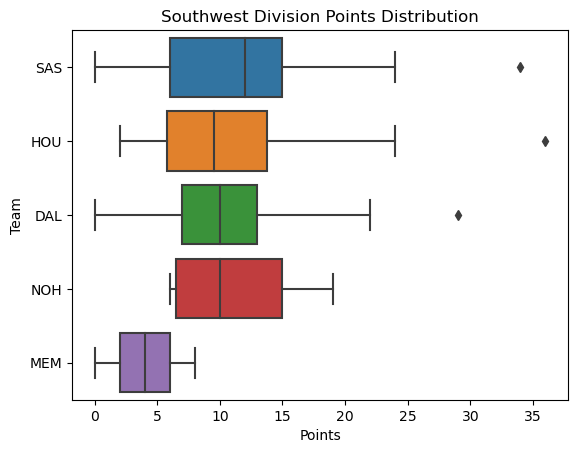

In [144]:
# Distributions of Points by Division

sns.boxplot(data=Atlantic_Div, x="PTS", y="Tm").set(title='Atlantic Division Points Distribution', xlabel="Points", ylabel="Team")
plt.savefig("../EDA/Atlantic-Team-PTS.png")
plt.show()

sns.boxplot(data=Central_Div, x="PTS", y="Tm").set(title='Central Division Points Distribution', xlabel="Points", ylabel="Team")
plt.savefig("../EDA/Central-Team-PTS.png")
plt.show()

sns.boxplot(data=Southeast_Div, x="PTS", y="Tm").set(title='Southeast Division Points Distribution', xlabel="Points", ylabel="Team")
plt.savefig("../EDA/Southeast-Team-PTS.png")
plt.show()

sns.boxplot(data=Northwest_Div, x="PTS", y="Tm").set(title='Northwest Division Points Distribution', xlabel="Points", ylabel="Team")
plt.savefig("../EDA/Northwest-Team-PTS.png")
plt.show()

sns.boxplot(data=Pacific_Div, x="PTS", y="Tm").set(title='Pacific Division Points Distribution', xlabel="Points", ylabel="Team")
plt.savefig("../EDA/Pacific-Team-PTS.png")
plt.show()

sns.boxplot(data=Southwest_Div, x="PTS", y="Tm").set(title='Southwest Division Points Distribution', xlabel="Points", ylabel="Team")
plt.savefig("../EDA/Southwest-Team-PTS.png")
plt.show()

/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self.

<function matplotlib.pyplot.show(close=None, block=None)>

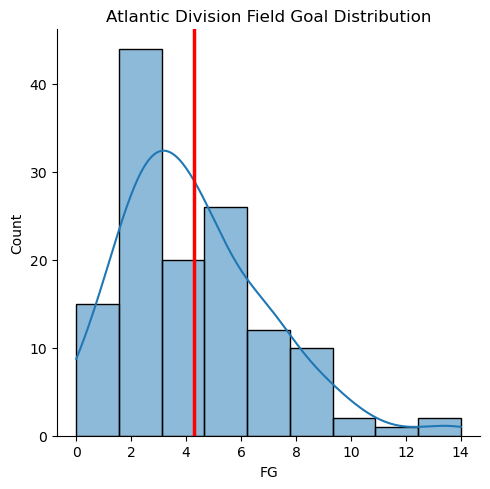

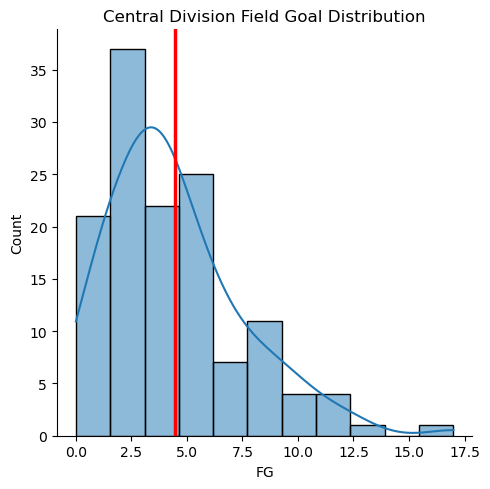

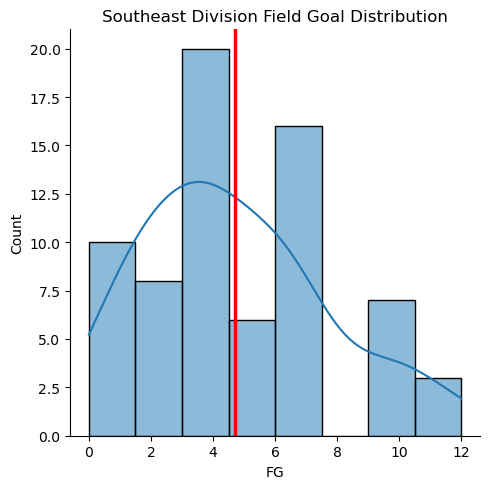

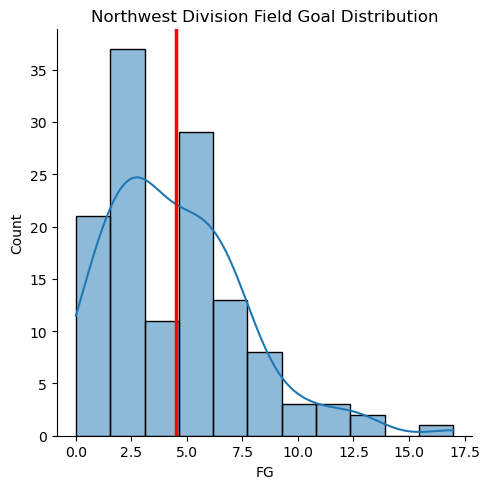

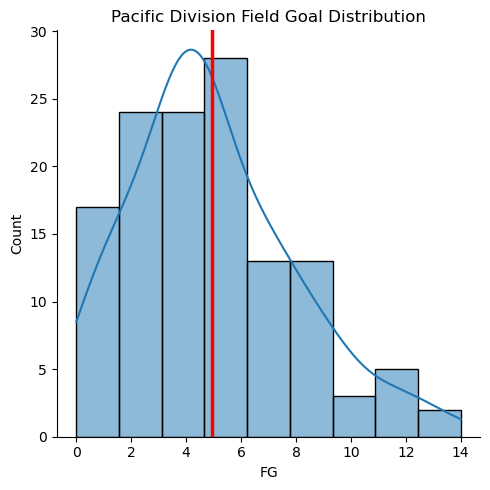

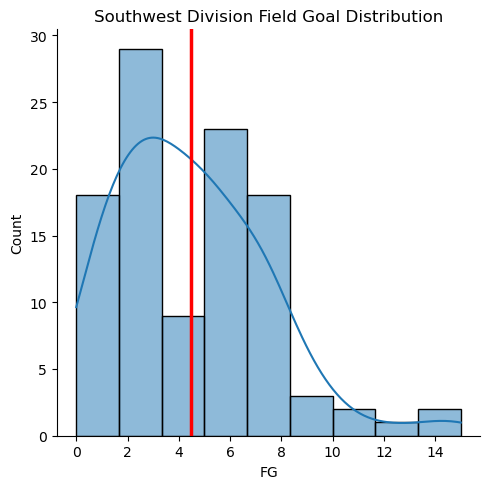

In [145]:
# Distributions of Field Goals by Division

A = sns.displot(data=Atlantic_Div, x="FG", kde=True).set(title='Atlantic Division Field Goal Distribution')
A.map(mean,'FG')
plt.savefig("../EDA/Atlantic-FG-Hist.png")
plt.show

B = sns.displot(data=Central_Div, x="FG", kde=True).set(title='Central Division Field Goal Distribution')
B.map(mean,'FG')
plt.savefig("../EDA/Central-FG-Hist.png")
plt.show

C = sns.displot(data=Southeast_Div, x="FG", kde=True).set(title='Southeast Division Field Goal Distribution')
C.map(mean,'FG')
plt.savefig("../EDA/Southeast-FG-Hist.png")
plt.show

D = sns.displot(data=Northwest_Div, x="FG", kde=True).set(title='Northwest Division Field Goal Distribution')
D.map(mean,'FG')
plt.savefig("../EDA/Northwest-FG-Hist.png")
plt.show

E = sns.displot(data=Pacific_Div, x="FG", kde=True).set(title='Pacific Division Field Goal Distribution')
E.map(mean,'FG')
plt.savefig("../EDA/Pacific-FG-Hist.png")
plt.show

F = sns.displot(data=Southwest_Div, x="FG", kde=True).set(title='Southwest Division Field Goal Distribution')
F.map(mean,'FG')
plt.savefig("../EDA/Southwest-FG-Hist.png")
plt.show

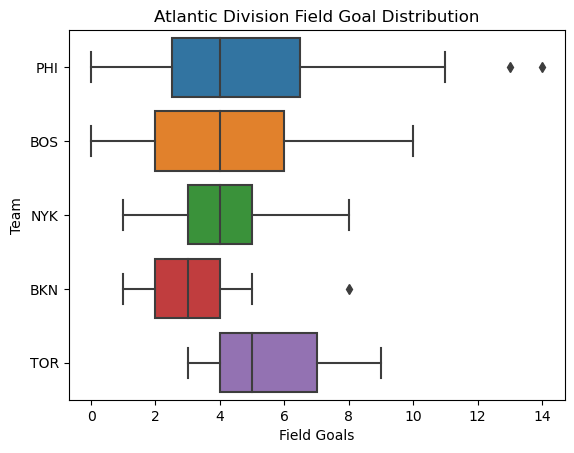

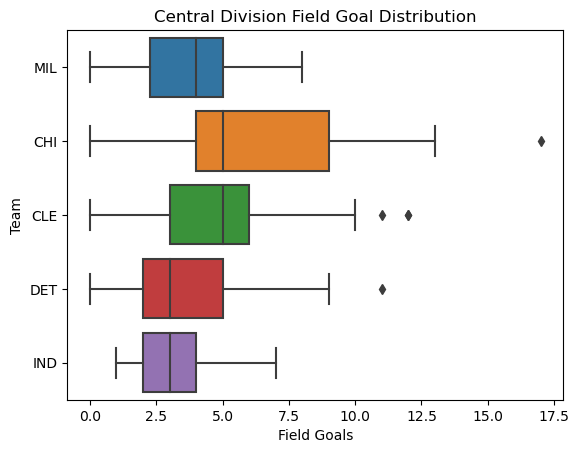

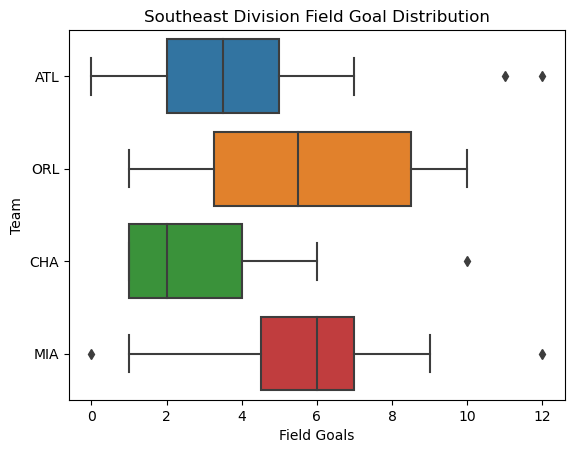

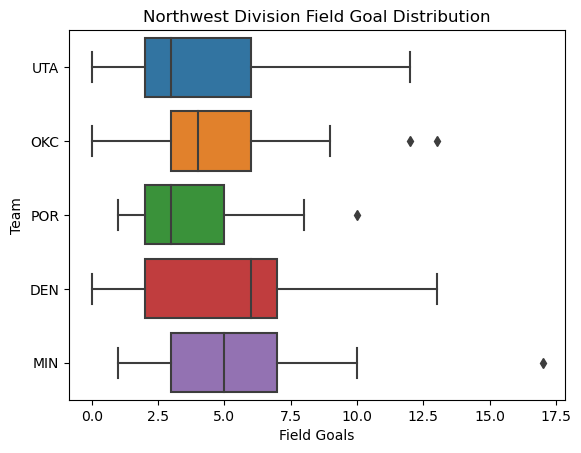

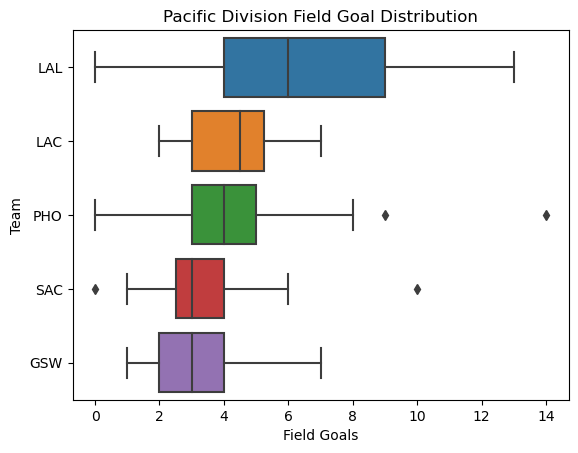

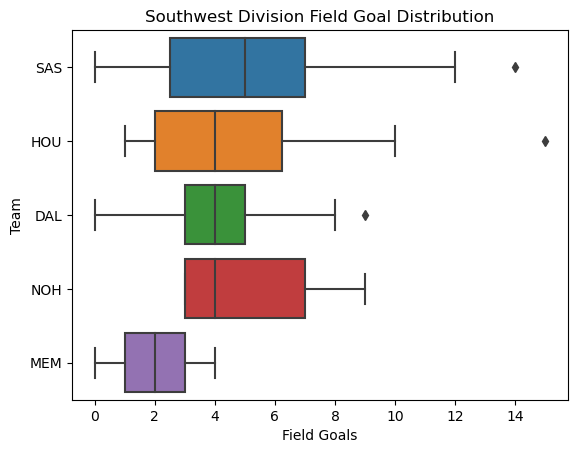

In [146]:
# Distributions of Field Goal by Division

sns.boxplot(data=Atlantic_Div, x="FG", y="Tm").set(title='Atlantic Division Field Goal Distribution', xlabel="Field Goals", ylabel="Team")
plt.savefig("../EDA/Atlantic-FG-Boxplot.png")
plt.show()

sns.boxplot(data=Central_Div, x="FG", y="Tm").set(title='Central Division Field Goal Distribution', xlabel="Field Goals", ylabel="Team")
plt.savefig("../EDA/Central-FG-Boxplot.png")
plt.show()

sns.boxplot(data=Southeast_Div, x="FG", y="Tm").set(title='Southeast Division Field Goal Distribution', xlabel="Field Goals", ylabel="Team")
plt.savefig("../EDA/Southeast-FG-Boxplot.png")
plt.show()

sns.boxplot(data=Northwest_Div, x="FG", y="Tm").set(title='Northwest Division Field Goal Distribution', xlabel="Field Goals", ylabel="Team")
plt.savefig("../EDA/Northwest-FG-Boxplot.png")
plt.show()

sns.boxplot(data=Pacific_Div, x="FG", y="Tm").set(title='Pacific Division Field Goal Distribution', xlabel="Field Goals", ylabel="Team")
plt.savefig("../EDA/Pacific-FG-Boxplot.png")
plt.show()

sns.boxplot(data=Southwest_Div, x="FG", y="Tm").set(title='Southwest Division Field Goal Distribution', xlabel="Field Goals", ylabel="Team")
plt.savefig("../EDA/Southwest-FG-Boxplot.png")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

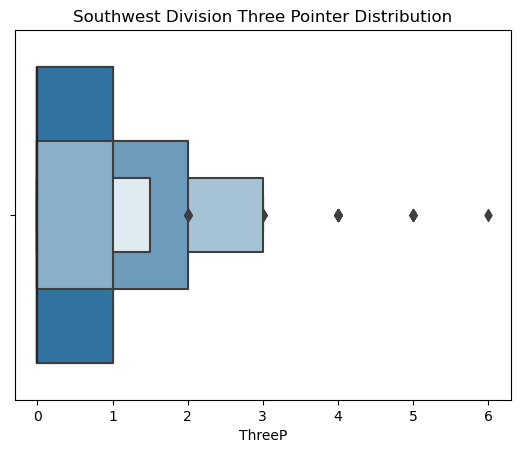

In [147]:
# Distributions of Three Pointers by Division

sns.boxenplot(data=Atlantic_Div, x="ThreeP").set(title='Atlantic Division Three Pointer Distribution')
plt.savefig("../EDA/Atlantic-Boxen-3P.png")
plt.show

sns.boxenplot(data=Central_Div, x="ThreeP").set(title='Central Division Three Pointer Distribution')
plt.savefig("../EDA/Central-Boxen-3P.png")
plt.show

sns.boxenplot(data=Southeast_Div, x="ThreeP").set(title='Southeast Division Three Pointer Distribution')
plt.savefig("../EDA/Southeast-Boxen-3P.png")
plt.show

sns.boxenplot(data=Northwest_Div, x="ThreeP").set(title='Northwest Division Three Pointer Distribution')
plt.savefig("../EDA/Northwest-Boxen-3P.png")
plt.show

sns.boxenplot(data=Pacific_Div, x="ThreeP").set(title='Pacific Division Three Pointer Distribution')
plt.savefig("../EDA/Pacific-Boxen-3P.png")
plt.show

sns.boxenplot(data=Southwest_Div, x="ThreeP").set(title='Southwest Division Three Pointer Distribution')
plt.savefig("../EDA/Southwest-Boxen-3P.png")
plt.show

/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/tori/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self.

<function matplotlib.pyplot.show(close=None, block=None)>

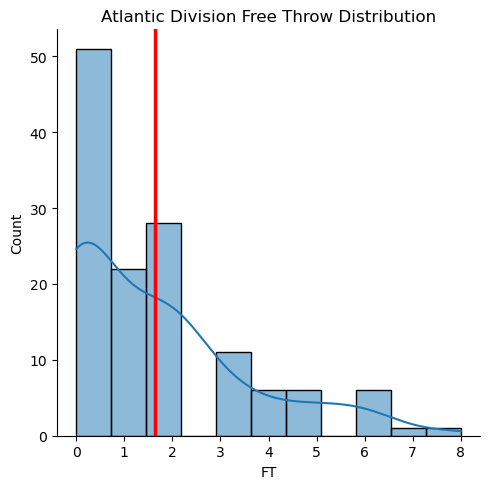

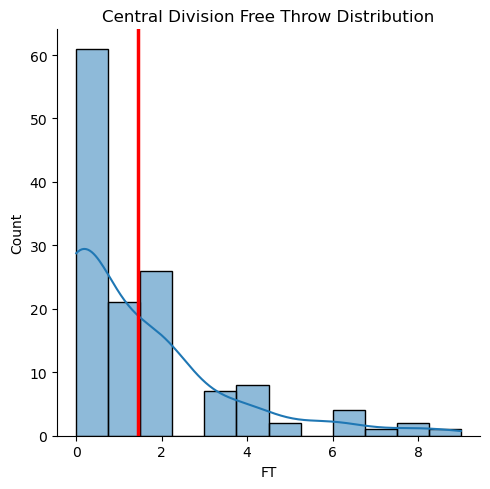

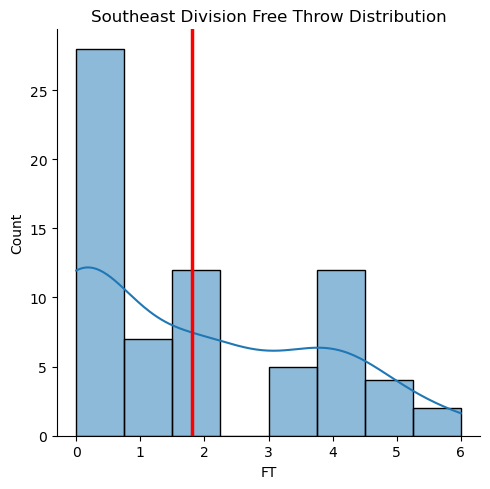

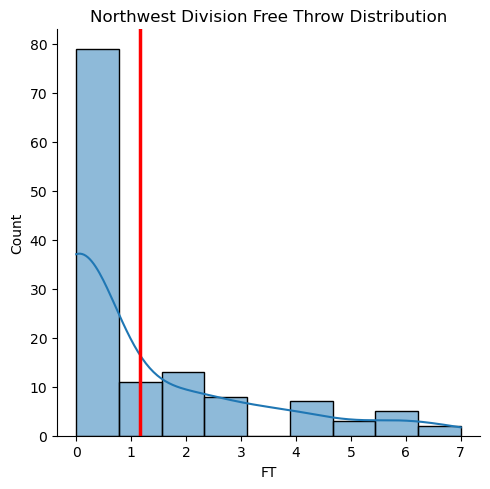

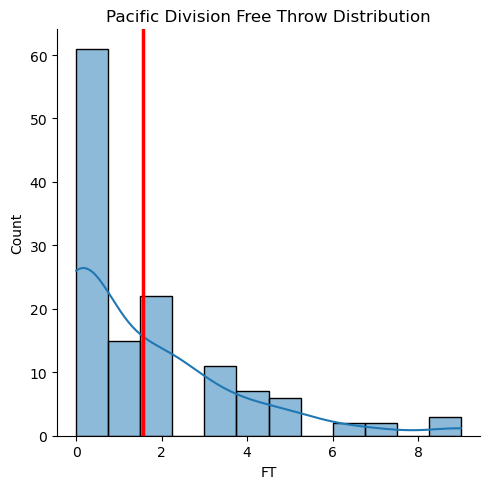

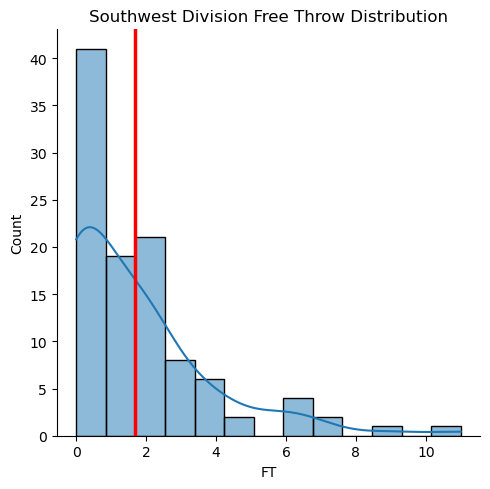

In [148]:
# Distributions of Free Throws by Division

AD = sns.displot(data=Atlantic_Div, x="FT", kde=True).set(title='Atlantic Division Free Throw Distribution')
AD.map(mean,'FT')
plt.savefig("../EDA/Atlantic-FT-Hist.png")
plt.show

CD = sns.displot(data=Central_Div, x="FT", kde=True).set(title='Central Division Free Throw Distribution')
CD.map(mean,'FT')
plt.savefig("../EDA/Central-FT-Hist.png")
plt.show

SED = sns.displot(data=Southeast_Div, x="FT", kde=True).set(title='Southeast Division Free Throw Distribution')
SED.map(mean,'FT')
plt.savefig("../EDA/Southeast-FT-Hist.png")
plt.show

NWD = sns.displot(data=Northwest_Div, x="FT", kde=True).set(title='Northwest Division Free Throw Distribution')
NWD.map(mean,'FT')
plt.savefig("../EDA/Northwest-FT-Hist.png")
plt.show

PD = sns.displot(data=Pacific_Div, x="FT", kde=True).set(title='Pacific Division Free Throw Distribution')
PD.map(mean,'FT')
plt.savefig("../EDA/Pacific-FT-Hist.png")
plt.show

SWD = sns.displot(data=Southwest_Div, x="FT", kde=True).set(title='Southwest Division Free Throw Distribution')
SWD.map(mean,'FT')
plt.savefig("../EDA/Southwest-FT-Hist.png")
plt.show

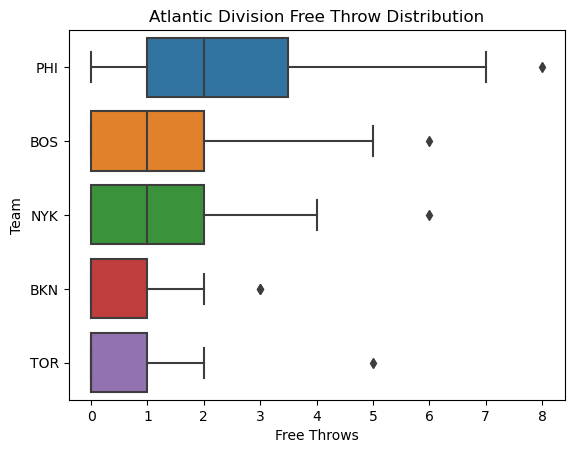

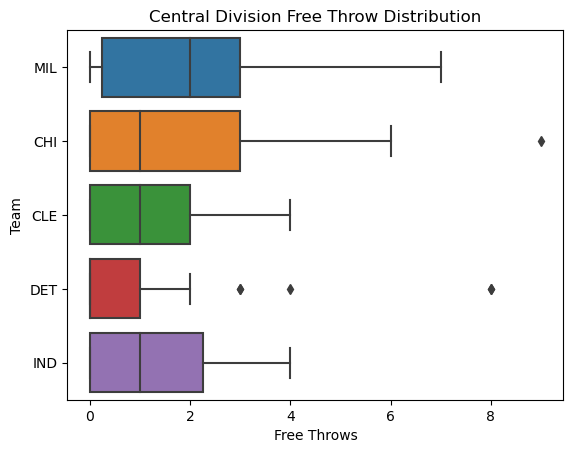

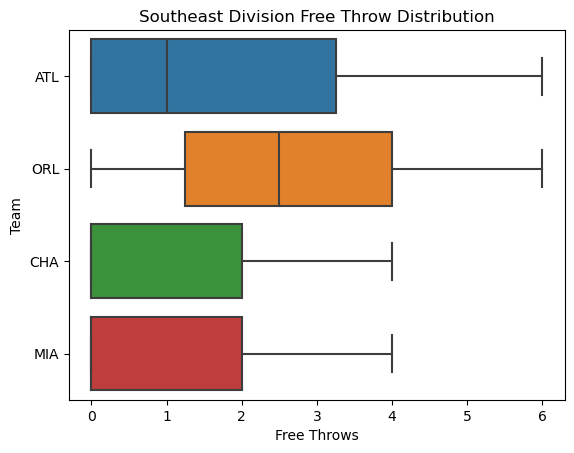

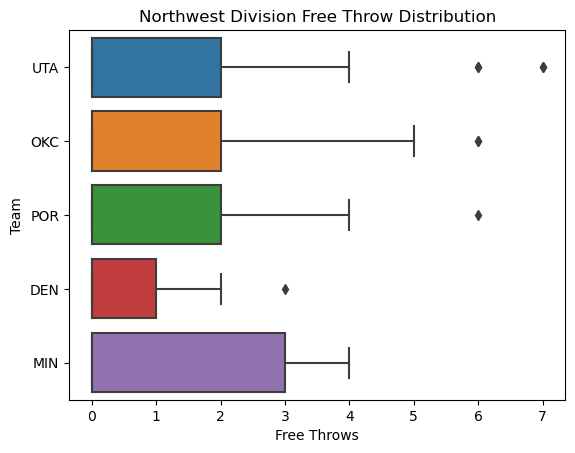

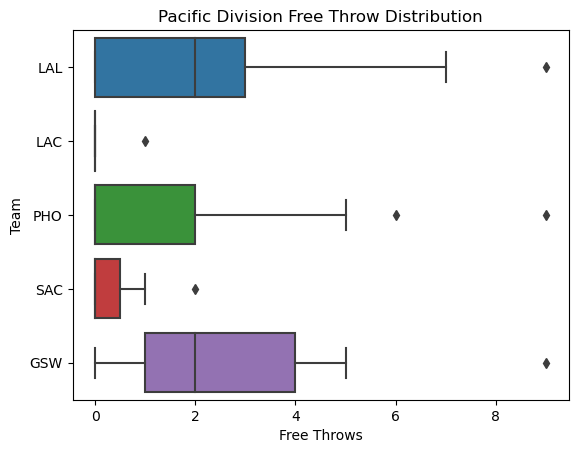

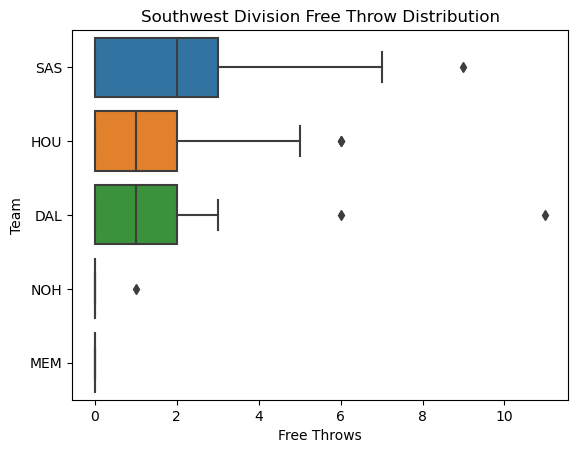

In [149]:
# Distributions of Free Throw by Division

sns.boxplot(data=Atlantic_Div, x="FT", y="Tm").set(title='Atlantic Division Free Throw Distribution', xlabel="Free Throws", ylabel="Team")
plt.savefig("../EDA/Atlantic-FT.png")
plt.show()

sns.boxplot(data=Central_Div, x="FT", y="Tm").set(title='Central Division Free Throw Distribution', xlabel="Free Throws", ylabel="Team")
plt.savefig("../EDA/Central-FT.png")
plt.show()

sns.boxplot(data=Southeast_Div, x="FT", y="Tm").set(title='Southeast Division Free Throw Distribution', xlabel="Free Throws", ylabel="Team")
plt.savefig("../EDA/Southeast-FT.png")
plt.show()

sns.boxplot(data=Northwest_Div, x="FT", y="Tm").set(title='Northwest Division Free Throw Distribution', xlabel="Free Throws", ylabel="Team")
plt.savefig("../EDA/Northwest-FT.png")
plt.show()

sns.boxplot(data=Pacific_Div, x="FT", y="Tm").set(title='Pacific Division Free Throw Distribution', xlabel="Free Throws", ylabel="Team")
plt.savefig("../EDA/Pacific-FT.png")
plt.show()

sns.boxplot(data=Southwest_Div, x="FT", y="Tm").set(title='Southwest Division Free Throw Distribution', xlabel="Free Throws", ylabel="Team")
plt.savefig("../EDA/Southwest-FT.png")
plt.show()

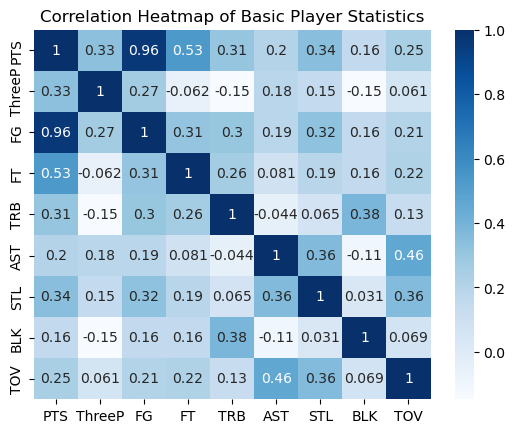

In [150]:
# Correlation heatmap
basic_stats = df[['PTS', 'ThreeP', 'FG', 'FT', 'TRB', 'AST', 'STL', 'BLK', 'TOV']]
correlation = basic_stats.corr()
sns.heatmap(correlation, cmap="Blues", annot=True).set(title="Correlation Heatmap of Basic Player Statistics")
plt.savefig("../EDA/Corr-BasicStats.png")

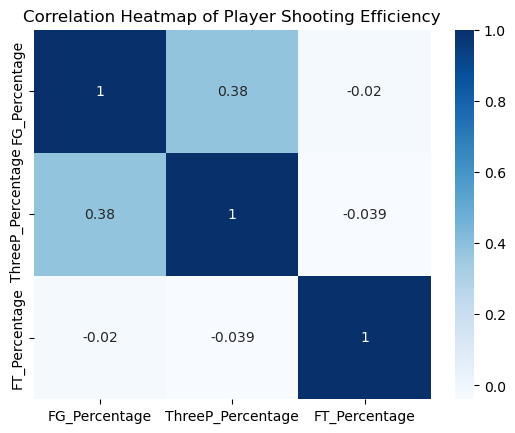

In [151]:
# Correlation heatmap
num_cols = df[['FG_Percentage', 'ThreeP_Percentage', 'FT_Percentage']]
correlation = num_cols.corr()
sns.heatmap(correlation, cmap="Blues", annot=True).set(title="Correlation Heatmap of Player Shooting Efficiency")
plt.savefig("../EDA/ShootingEfficency.png")

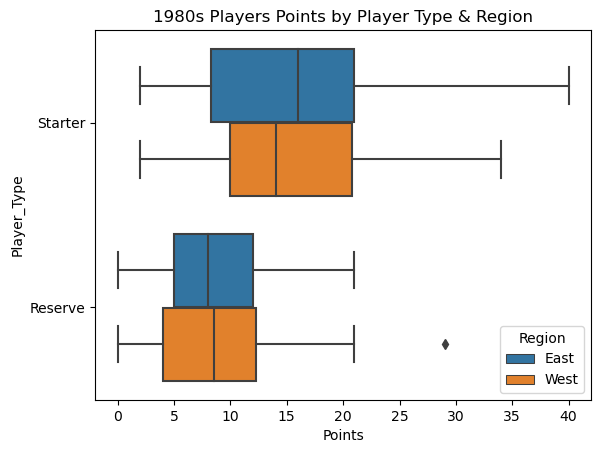

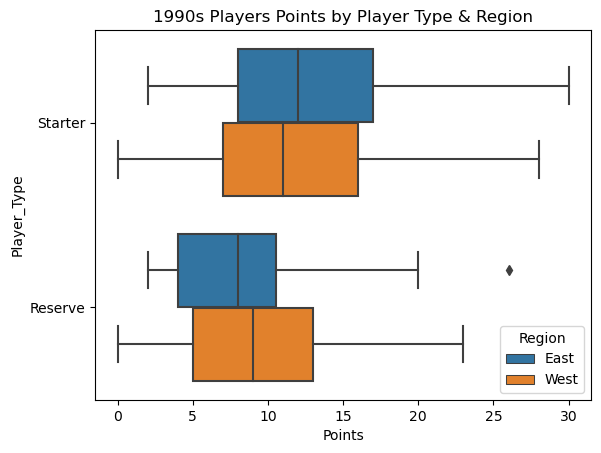

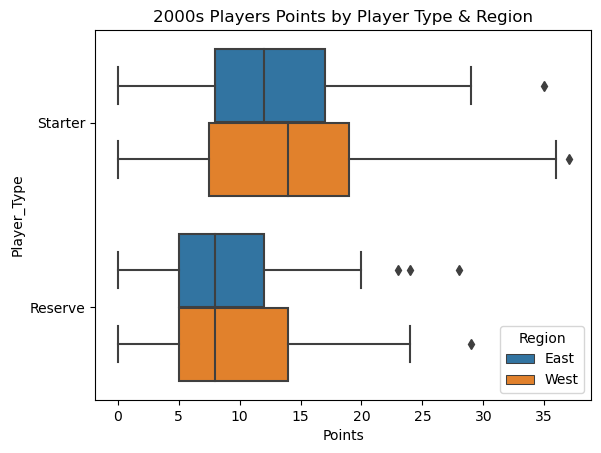

In [152]:
# Height distribution based on player type 
sns.boxplot(data=Game_1980s, x="PTS", y="Player_Type", hue="Region").set(title='1980s Players Points by Player Type & Region', xlabel="Points")
plt.savefig("../1980s-PTS.png")
plt.show()

sns.boxplot(data=Game_1990s, x="PTS", y="Player_Type", hue="Region").set(title='1990s Players Points by Player Type & Region', xlabel="Points")
plt.savefig("../1990s-PTS.png")
plt.show()

sns.boxplot(data=Game_2000s, x="PTS", y="Player_Type", hue="Region").set(title='2000s Players Points by Player Type & Region', xlabel="Points")
plt.savefig("../2000s-PTS.png")
plt.show()